# Melanoma Classification

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pydicom as dicom
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# Analysing Patient Records

In [2]:
df = pd.read_csv('melanoma-classification/train.csv')
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [3]:
df = df.rename(columns = {'anatom_site_general_challenge':'site'})

In [4]:
df.head()

,image_name,patient_id,sex,age_approx,site,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [5]:
df.shape

(33126, 8)

In [6]:
df.isnull().sum()

image_name            0
patient_id            0
sex                  65
age_approx           68
site                527
diagnosis             0
benign_malignant      0
target                0
dtype: int64

In [7]:
df = df.dropna(axis=0, how = 'any')

In [8]:
df.isnull().sum()

image_name          0
patient_id          0
sex                 0
age_approx          0
site                0
diagnosis           0
benign_malignant    0
target              0
dtype: int64

In [9]:
df.shape

(32531, 8)

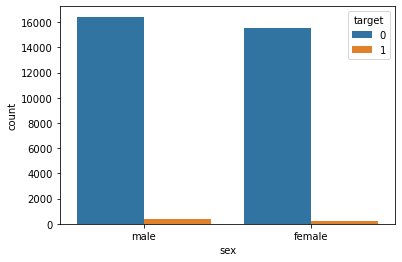

In [10]:
sns.countplot(x = 'sex', data = df, hue = 'target')

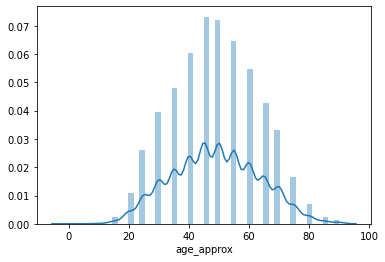

In [11]:
sns.distplot(df['age_approx'])

In [12]:
age = []
sex = []
for i in range(df.shape[0]):
    try: 
        if df['target'][i] == 1:
            age.append(df['age_approx'][i]) 
            sex.append(df['sex'][i])
    except:
        pass

Text(0.5, 1.0, 'Count plot of age of people having malignant cancer')

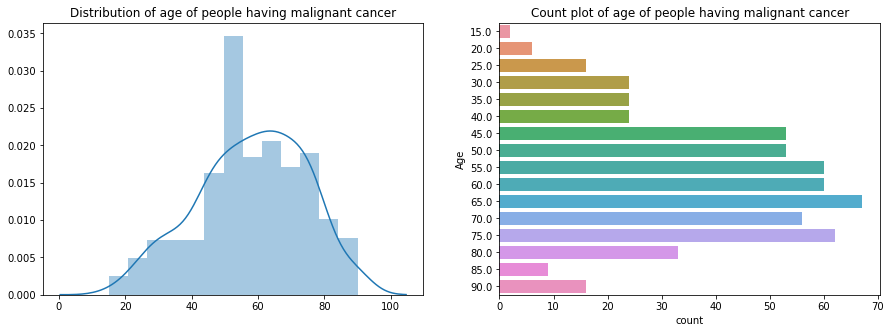

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(age)
plt.title('Distribution of age of people having malignant cancer')

plt.subplot(1,2,2)
sns.countplot(y = age)
plt.ylabel('Age')
plt.title('Count plot of age of people having malignant cancer')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

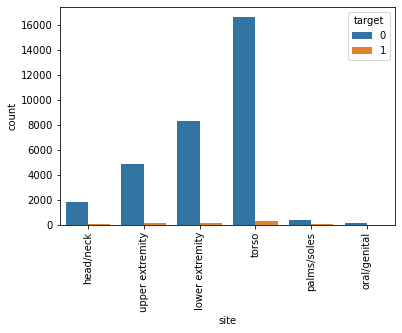

In [14]:
sns.countplot(x='site', data=df, hue='target')
plt.xticks(rotation='90')

In [15]:
site = []
for i in range(df.shape[0]):
    try: 
        if df['target'][i] == 1:
            site.append(df['site'][i]) 
    except:
        pass
    

Text(0, 0.5, 'Site')

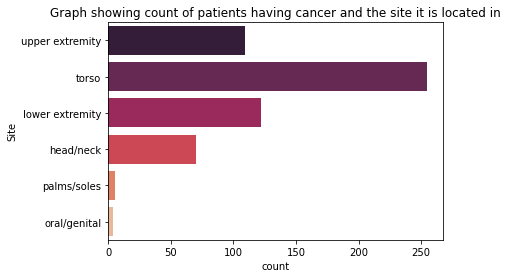

In [16]:
sns.countplot(y = site,palette="rocket")
plt.title('Graph showing count of patients having cancer and the site it is located in')
plt.ylabel('Site')

In [17]:
diagnosis = []
for i in range(df.shape[0]):
    try: 
        if df['target'][i] == 1:
            diagnosis.append(df['diagnosis'][i]) 
    except:
        pass
    

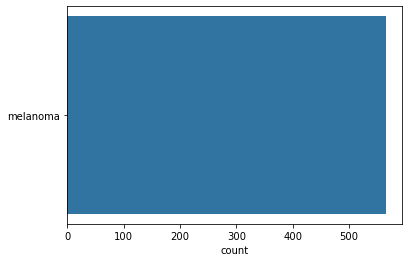

In [18]:
sns.countplot(y = diagnosis)

In [19]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [20]:
df.site.unique()

array(['head/neck', 'upper extremity', 'lower extremity', 'torso',
       'palms/soles', 'oral/genital'], dtype=object)

In [21]:
df.diagnosis.unique()

array(['unknown', 'nevus', 'melanoma', 'seborrheic keratosis',
       'lentigo NOS', 'lichenoid keratosis', 'solar lentigo',
       'cafe-au-lait macule', 'atypical melanocytic proliferation'],
      dtype=object)

In [22]:
df = pd.get_dummies(df, columns = ['sex'],drop_first=True)
df.head()

,image_name,patient_id,age_approx,site,diagnosis,benign_malignant,target,sex_male
0,ISIC_2637011,IP_7279968,45.0,head/neck,unknown,benign,0,1
1,ISIC_0015719,IP_3075186,45.0,upper extremity,unknown,benign,0,0
2,ISIC_0052212,IP_2842074,50.0,lower extremity,nevus,benign,0,0
3,ISIC_0068279,IP_6890425,45.0,head/neck,unknown,benign,0,0
4,ISIC_0074268,IP_8723313,55.0,upper extremity,unknown,benign,0,0


In [23]:
df = pd.get_dummies(df, columns = ['site'],drop_first=True)
df.head()

,image_name,patient_id,age_approx,diagnosis,benign_malignant,target,sex_male,site_lower extremity,site_oral/genital,site_palms/soles,site_torso,site_upper extremity
0,ISIC_2637011,IP_7279968,45.0,unknown,benign,0,1,0,0,0,0,0
1,ISIC_0015719,IP_3075186,45.0,unknown,benign,0,0,0,0,0,0,1
2,ISIC_0052212,IP_2842074,50.0,nevus,benign,0,0,1,0,0,0,0
3,ISIC_0068279,IP_6890425,45.0,unknown,benign,0,0,0,0,0,0,0
4,ISIC_0074268,IP_8723313,55.0,unknown,benign,0,0,0,0,0,0,1


In [24]:
df = pd.get_dummies(df, columns = ['diagnosis'],drop_first=True)


In [25]:
df = df.drop('diagnosis_unknown', axis = 1)
df.head()

,image_name,patient_id,age_approx,benign_malignant,target,sex_male,site_lower extremity,site_oral/genital,site_palms/soles,site_torso,site_upper extremity,diagnosis_cafe-au-lait macule,diagnosis_lentigo NOS,diagnosis_lichenoid keratosis,diagnosis_melanoma,diagnosis_nevus,diagnosis_seborrheic keratosis,diagnosis_solar lentigo
0,ISIC_2637011,IP_7279968,45.0,benign,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,ISIC_0015719,IP_3075186,45.0,benign,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,ISIC_0052212,IP_2842074,50.0,benign,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,ISIC_0068279,IP_6890425,45.0,benign,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ISIC_0074268,IP_8723313,55.0,benign,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [26]:
df = df.drop(['benign_malignant', 'patient_id'], axis = 1)
df.head()

,image_name,age_approx,target,sex_male,site_lower extremity,site_oral/genital,site_palms/soles,site_torso,site_upper extremity,diagnosis_cafe-au-lait macule,diagnosis_lentigo NOS,diagnosis_lichenoid keratosis,diagnosis_melanoma,diagnosis_nevus,diagnosis_seborrheic keratosis,diagnosis_solar lentigo
0,ISIC_2637011,45.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,ISIC_0015719,45.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,ISIC_0052212,50.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,ISIC_0068279,45.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ISIC_0074268,55.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


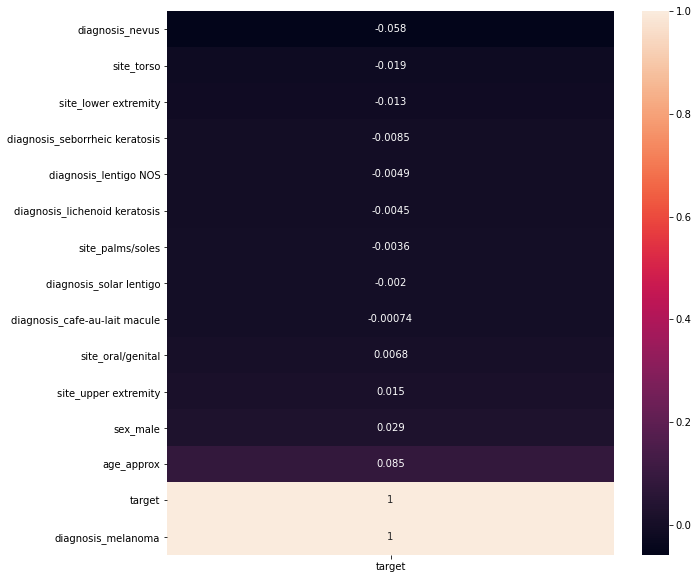

In [27]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr()[['target']].sort_values('target').tail(16), annot = True)

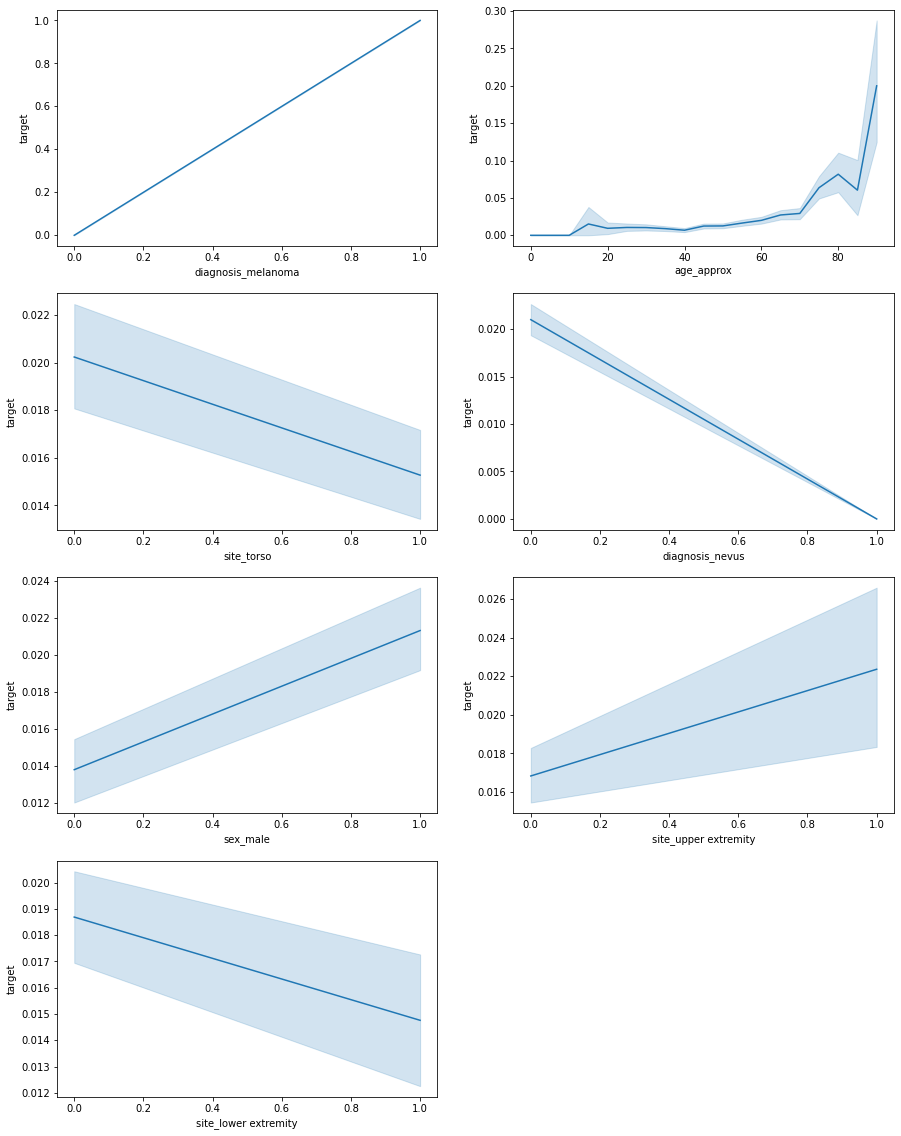

In [28]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.lineplot(df['diagnosis_melanoma'], df['target'])
plt.subplot(4,2,2)
sns.lineplot(df['age_approx'], df['target'])
plt.subplot(4,2,3)
sns.lineplot(df['site_torso'], df['target'])
plt.subplot(4,2,4)
sns.lineplot(df['diagnosis_nevus'], df['target'])
plt.subplot(4,2,5)
sns.lineplot(df['sex_male'], df['target'])
plt.subplot(4,2,6)
sns.lineplot(df['site_upper extremity'], df['target'])
plt.subplot(4,2,7)
sns.lineplot(df['site_lower extremity'], df['target'])

> # Training and Testing the Model

In [29]:
X = df[['diagnosis_melanoma','site_torso','diagnosis_nevus','site_lower extremity','site_upper extremity', 'sex_male', 'age_approx']]
y = df['target']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train,y_train)

y_pred_lr = classifier_lr.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred_lr))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_lr))

Accuracy Score:  1.0
Confusion Matrix: 
 [[6396    0]
 [   0  111]]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Support Vector Machine

In [32]:
from sklearn import svm

classifier_svm = svm.SVC()
classifier_svm.fit(X_train,y_train)

y_pred_svm = classifier_svm.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred_svm))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_svm))

Accuracy Score:  0.9829414476717381
Confusion Matrix: 
 [[6396    0]
 [ 111    0]]


## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train,y_train)

y_pred_dt = classifier_dt.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred_dt))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_dt))

Accuracy Score:  1.0
Confusion Matrix: 
 [[6396    0]
 [   0  111]]


## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train,y_train)

y_pred_rf = classifier_rf.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred_rf))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_rf))

Accuracy Score:  1.0
Confusion Matrix: 
 [[6396    0]
 [   0  111]]


## Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_gb = GradientBoostingClassifier()
classifier_gb.fit(X_train,y_train)

y_pred_gb = classifier_gb.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred_gb))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_gb))

Accuracy Score:  1.0
Confusion Matrix: 
 [[6396    0]
 [   0  111]]


## Adaptive Boosting

In [36]:
from sklearn.ensemble import AdaBoostClassifier

classifier_ab = AdaBoostClassifier()
classifier_ab.fit(X_train,y_train)

y_pred_ab = classifier_ab.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred_ab))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_ab))

Accuracy Score:  1.0
Confusion Matrix: 
 [[6396    0]
 [   0  111]]


(0.9, 1.003)

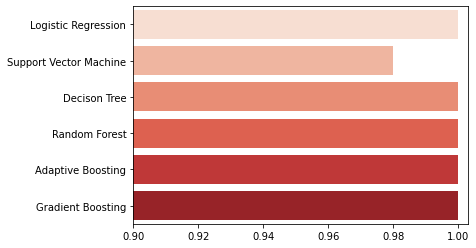

In [37]:
x_l = ['Logistic Regression', 'Support Vector Machine', 'Decison Tree', 'Random Forest', 'Adaptive Boosting', 'Gradient Boosting']
y_l = [1.0, 0.98, 1.0, 1.0, 1.0, 1.0]

sns.barplot(y_l, x_l,palette="Reds")
plt.xlim([0.9, 1.003])

In [38]:
train1 = svm.SVC()
train1.fit(X_train,y_train)

SVC()

# Analysing Images

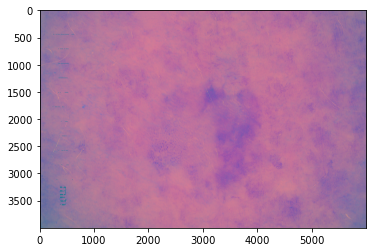

In [39]:
image = '/kaggle/input/siim-isic-melanoma-classification/train/' + df['image_name'][91] +'.dcm'
ds = dicom.dcmread(image)

plt.imshow(ds.pixel_array)

In [40]:
s0 = df.target[df.target.eq(0)].sample(50, random_state=1).index
s1 = df.target[df.target.eq(1)].sample(60,random_state=1).index 

df = df.loc[s0.union(s1)]
df['target'].value_counts()

1    60
0    50
Name: target, dtype: int64

In [41]:
df.shape

(110, 16)

In [42]:
images = []
for x in df['image_name']:
    image = '/kaggle/input/siim-isic-melanoma-classification/train/' + x +'.dcm'
    ds = dicom.dcmread(image)
    pixels = ds.pixel_array
    images.append(pixels.flatten())


In [43]:
import tensorflow as tf
images = tf.keras.preprocessing.sequence.pad_sequences(
  images,
  maxlen = 720,
  dtype = "int32",
  padding = "pre",
  truncating = "pre",
  value = 0
)

# Training the Model

## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
X = images
y = np.array(df['target'])
classifier_lr = LogisticRegression()
classifier_lr.fit(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

## Support Vector Machine

In [45]:
from sklearn import svm
X = images
y = np.array(df['target'])
classifier_svm = svm.SVC()
classifier_svm.fit(X,y)

SVC()

## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
X = images
y = np.array(df['target'])
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X,y)

DecisionTreeClassifier()

## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
X = images
y = np.array(df['target'])
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X,y)

RandomForestClassifier()

## Adaptive Boosting 

In [48]:
from sklearn.ensemble import AdaBoostClassifier
X = images
y = np.array(df['target'])
classifier_ab = AdaBoostClassifier()
classifier_ab.fit(X,y)

AdaBoostClassifier()

## Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
X = images
y = np.array(df['target'])
classifier_gb = GradientBoostingClassifier()
classifier_gb.fit(X,y)

GradientBoostingClassifier()

# Testing the Model

In [50]:
test = df.tail(50)
test.head()

,image_name,age_approx,target,sex_male,site_lower extremity,site_oral/genital,site_palms/soles,site_torso,site_upper extremity,diagnosis_cafe-au-lait macule,diagnosis_lentigo NOS,diagnosis_lichenoid keratosis,diagnosis_melanoma,diagnosis_nevus,diagnosis_seborrheic keratosis,diagnosis_solar lentigo
20065,ISIC_6096306,50.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
20775,ISIC_6313487,70.0,1,1,0,0,0,1,0,0,0,0,1,0,0,0
21139,ISIC_6417037,30.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21407,ISIC_6496251,35.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
21504,ISIC_6526489,50.0,1,1,0,0,0,1,0,0,0,0,1,0,0,0


In [51]:
test_images = []
for x in test['image_name']:
    image = '/kaggle/input/siim-isic-melanoma-classification/train/' + x +'.dcm'
    ds = dicom.dcmread(image)
    pixels = ds.pixel_array
    
    test_images.append(pixels.flatten())


In [52]:
test_images = tf.keras.preprocessing.sequence.pad_sequences(
  test_images,
  maxlen = 720,
  dtype = "int32",
  padding = "pre",
  truncating = "pre",
  value = 0
)

## Logistic Regression

In [53]:
X_test = test_images
y_test = np.array(test['target'])
y_pred_lr = classifier_lr.predict(X_test)

In [54]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred_lr))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_lr))

Accuracy Score:  0.98
Confusion Matrix: 
 [[23  0]
 [ 1 26]]


## Support Vector Machine

In [55]:
X_test = test_images
y_test = np.array(test['target'])
y_pred_svm = classifier_svm.predict(X_test)

In [56]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred_svm))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_svm))

Accuracy Score:  0.76
Confusion Matrix: 
 [[16  7]
 [ 5 22]]


## Decision Tree

In [57]:
X_test = test_images
y_test = np.array(test['target'])
y_pred_dt = classifier_dt.predict(X_test)

In [58]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred_dt))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_dt))

Accuracy Score:  1.0
Confusion Matrix: 
 [[23  0]
 [ 0 27]]


## Random Forest

In [59]:
X_test = test_images
y_test = np.array(test['target'])
y_pred_rf = classifier_rf.predict(X_test)

In [60]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred_rf))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_rf))

Accuracy Score:  1.0
Confusion Matrix: 
 [[23  0]
 [ 0 27]]


## Adaptive Boosting

In [61]:
X_test = test_images
y_test = np.array(test['target'])
y_pred_ab = classifier_ab.predict(X_test)

In [62]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred_ab))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_ab))

Accuracy Score:  1.0
Confusion Matrix: 
 [[23  0]
 [ 0 27]]


## Gradient Boosting

In [63]:
X_test = test_images
y_test = np.array(test['target'])
y_pred_gb = classifier_gb.predict(X_test)

In [64]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred_gb))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_gb))

Accuracy Score:  1.0
Confusion Matrix: 
 [[23  0]
 [ 0 27]]


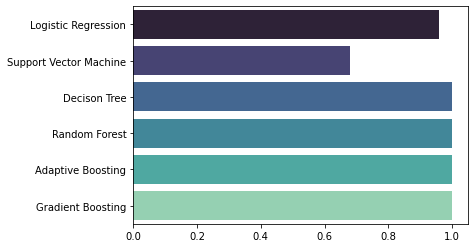

In [65]:
x_l = ['Logistic Regression', 'Support Vector Machine', 'Decison Tree', 'Random Forest', 'Adaptive Boosting', 'Gradient Boosting']
y_l = [0.96, 0.68, 1.0, 1.0, 1.0, 1.0]

sns.barplot(y_l, x_l,palette="mako")

In [66]:
train2 = LogisticRegression()
train2.fit(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [67]:
df.head()

,image_name,age_approx,target,sex_male,site_lower extremity,site_oral/genital,site_palms/soles,site_torso,site_upper extremity,diagnosis_cafe-au-lait macule,diagnosis_lentigo NOS,diagnosis_lichenoid keratosis,diagnosis_melanoma,diagnosis_nevus,diagnosis_seborrheic keratosis,diagnosis_solar lentigo
91,ISIC_0149568,55.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
273,ISIC_0198331,55.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
867,ISIC_0362190,45.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1288,ISIC_0489267,60.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
1345,ISIC_0507787,60.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# Final Testing

Result from patient details:  Malignant
Result from patient image:  Malignant


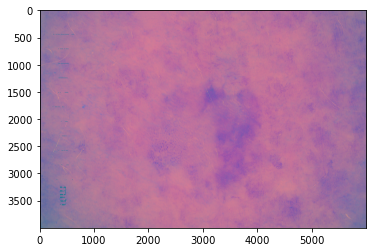

In [68]:
image_path = '/kaggle/input/siim-isic-melanoma-classification/train/ISIC_0149568.dcm'
details = [[55,0,0,0,1,1,0]]
image_to_test = []
ds = dicom.dcmread(image_path)
pixels = ds.pixel_array
plt.imshow(pixels)
image_to_test.append(pixels.flatten())

image_to_test = tf.keras.preprocessing.sequence.pad_sequences(
  image_to_test,
  maxlen = 720,
  dtype = "int32",
  padding = "pre",
  truncating = "pre",
  value = 0
)

if train1.predict(details) == [1]:
    
    result1 = 'Malignant'
else:
    result1 = 'Benign'

if train2.predict(image_to_test) == [1]:
    result2 = 'Malignant'
else:
    result2 = 'Benign'


print('Result from patient details: ', result1)
print('Result from patient image: ', result2)

## END